In [1]:
from qiskit import *
from dotenv import load_dotenv
import os
from qiskit.tools.visualization import plot_histogram
# Load the API key from the .env file
load_dotenv()
IBM_TOKEN = os.getenv('IBM_TOKEN')
IBMQ.save_account(IBM_TOKEN)

IBMQ.load_account()

configrc.store_credentials:WARNING:2023-01-09 05:32:14,463: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
# Create a Quantum Register with 2 qubits.
qr = QuantumRegister(2)
# Create a Classical Register with 2 bits.
cr = ClassicalRegister(2)
# Create a Quantum Circuit
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])

circuit.cx(qr[0], qr[1])

circuit.measure(qr, cr)

circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

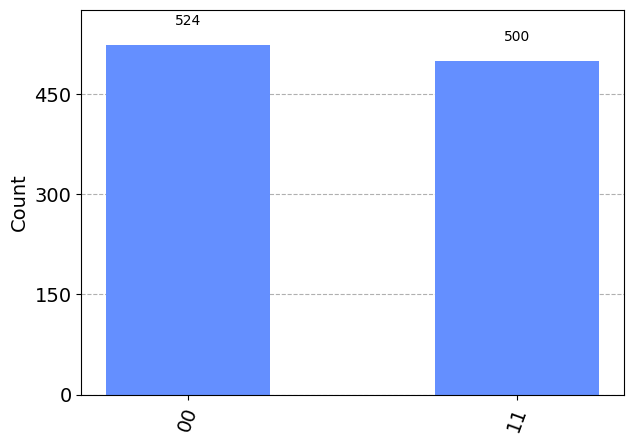

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))

In [4]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [5]:

# Create a Quantum Register with 2 qubits.
qr = QuantumRegister(2)
# Create a Classical Register with 2 bits.
cr = ClassicalRegister(2)
# Create a Quantum Circuit
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])

circuit.cx(qr[0], qr[1])

circuit.measure(qr, cr)

circuit.draw()

┌───┐     ┌─┐   
q4_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q4_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1

In [9]:
provider = IBMQ.get_provider(hub='ibm-q')
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [10]:
backend = provider.get_backend('ibmq_lima')

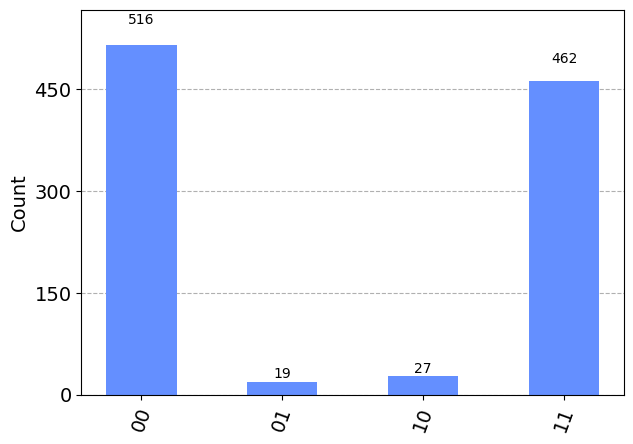

In [11]:
result = execute(circuit, backend, shots=1024).result()
plot_histogram(result.get_counts(circuit))

In [33]:
def get_backend(qubits=2, simulation=False):
    # Finds the best quantum computer at IBM with the lowest queue as long as it has enough qubits for the circuit
    if simulation == True:
        # Execute the circuit on a simulator backend
        best_backend = Aer.get_backend('qasm_simulator')
    else:
        # Execute the circuit on a real device backend
        lowest = 1000000
        provider = IBMQ.get_provider(hub='ibm-q')
        for backend in provider.backends():
            try:
                queue = backend.status().pending_jobs
                qubit_count = len(backend.properties().qubits)
                if qubit_count < qubits:
                    print(f"Backend {backend.name()} has {qubit_count} qubits, but we need {qubits} qubits")
                    continue
                if queue < lowest:
                    lowest = queue
                    best_backend = provider.get_backend(backend.name())
                print(f"Backend {backend.name()} has {queue} queued jobs and {qubit_count} qubits")
            except:
                print(f"Backend {backend.name()} is not operational")
        if best_backend is None:
            best_backend = provider.get_backend('ibmq_lima')
    print(f"Selected {backend} with {len(backend.properties().qubits)} qubits")
    return best_backend
backend = get_backend(qubits=circuit.num_qubits, simulation=False)

Backend ibmq_qasm_simulator is not operational
Backend ibmq_lima has 0 queued jobs and 5 qubits
Backend ibmq_belem has 0 queued jobs and 5 qubits
Backend ibmq_quito has 10 queued jobs and 5 qubits
Backend simulator_statevector is not operational
Backend simulator_mps is not operational
Backend simulator_extended_stabilizer is not operational
Backend simulator_stabilizer is not operational
Backend ibmq_manila has 68 queued jobs and 5 qubits
Backend ibm_nairobi has 35 queued jobs and 7 qubits
Backend ibm_oslo has 19 queued jobs and 7 qubits
Selected ibm_oslo with 7 qubits


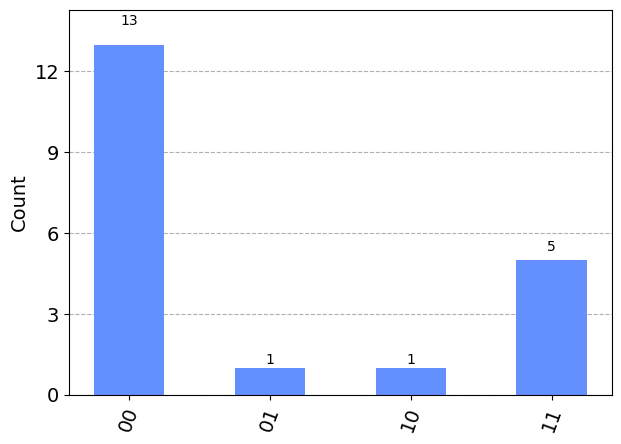

In [34]:
result = execute(circuit, backend=backend, shots=20).result()
plot_histogram(result.get_counts(circuit))

In [35]:
result.get_counts(circuit)

{'00': 13, '01': 1, '10': 1, '11': 5}

In [36]:
circuit_drawing = circuit.draw()
print(circuit_drawing)

      ┌───┐     ┌─┐   
q4_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q4_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1 


In [43]:
def get_quantum_computer(qubits=2, simulation=False):
    # Finds a quantum computer at IBM with the lowest queue as long as it has enough qubits for the circuit
    if simulation == False: # Execute the circuit on a quantum computer at IBM
        lowest = float('inf')
        provider = IBMQ.get_provider(hub='ibm-q')
        for backend in provider.backends():
            try:
                if "simulator" not in backend.name():
                    queue = backend.status().pending_jobs
                    qubit_count = len(backend.properties().qubits)
                    if qubit_count >= qubits:
                        if queue < lowest:
                            lowest = queue
                            quantum_comp = provider.get_backend(backend.name())
                        print(f"Quantum Computer {backend.name()} has {queue} queued jobs and {qubit_count} qubits")
                    else:
                        print(f"Quantum Computer {backend.name()} has {qubit_count} qubits, but we need {qubits} qubits")
            except:
                print(f"Quantum Computer {backend.name()} is not operational")
        if quantum_comp is None:
            print(f"No Quantum Computers available with {qubits} qubits, using simulator")
    if simulation == True or quantum_comp is None: # Execute the circuit on the simulator
        quantum_comp = Aer.get_backend('qasm_simulator')
    print(f"Using Quantum Computer: {quantum_comp.name()}")
    return quantum_comp
qc = get_quantum_computer(qubits=circuit.num_qubits, simulation=False)


Quantum Computer ibmq_lima has 0 queued jobs and 5 qubits
Quantum Computer ibmq_belem has 16 queued jobs and 5 qubits
Quantum Computer ibmq_quito has 11 queued jobs and 5 qubits
Quantum Computer ibmq_manila has 65 queued jobs and 5 qubits
Quantum Computer ibm_nairobi has 41 queued jobs and 7 qubits
Quantum Computer ibm_oslo has 29 queued jobs and 7 qubits
Using Quantum Computer: ibmq_lima
